In [2]:
import copy

import threading
from threading import Thread

import math
import random
import numpy as np
import math as m
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import matplotlib

In [3]:
def Theta():                      #define a function to generate random theta 
    ytest = np.log(1+1.5707963267948966)*random.random() #choose theta between 0 and 90
    # because exp is the inverse of log(x)
    # and log(x) is the CDF of the PDF 1/x
    xtest = np.exp(ytest)-1 
    return xtest 
def Phi():                      #define a function to generate random theta 
    ytest = np.log(1+6.283185307179586)*random.random() #choose phi between 0 and 360
    # because exp is the inverse of log(x)
    # and log(x) is the CDF of the PDF 1/x
    xtest = np.exp(ytest)-1
    return xtest
def Zvalue(): #x-a/b-a=[0,1] where a min of the interval ,and b the max which we want generate value between them
    ytest=(random.random()*(1.0982000000000003))+3.2488  #choose random number between log(25)and log(75)
    # because exp is the inverse of log(x)
    # and log(x) is the CDF of the PDF 1/x
    xtest = np.exp(ytest) 
    return int(xtest)   
def glune_diffusion(pInitialStart,pRadStart,Erad,Ecr,f,v):

    Ef2=Erad/2
    Theta1=Theta()
    Phi1=Phi()
    
    mInitial = [pRadStart[0]-pInitialStart[0] , pRadStart[1]-pInitialStart[1] , pRadStart[2]-pInitialStart[2]]
    
    mRad      = [0,0,0]
    mRad[0]   = Ef2*m.cos(Theta1)*m.cos(Phi1)
    mRad[1]   = Ef2*m.cos(Theta1)*m.sin(Phi1)
    mRad[2]   = Ef2*m.sin(Theta1)
    
    mFinal    = [0,0,0]
    mFinal[0] = mInitial[0]-mRad[0]
    mFinal[1] = mInitial[1]-mRad[1]
    mFinal[2] = mInitial[2]-mRad[2]

    pRad   = [pRadStart[0] + mRad[0],   pRadStart[1] + mRad[1],   pRadStart[2] + mRad[2]]  #calculate the next poin using theta/2
    pFinal = [pRadStart[0] + mFinal[0], pRadStart[1] + mFinal[1], pRadStart[2] + mFinal[2]]    #calculate the point in the opposite direction 

    mRad   = [pRad[0]-pRadStart[0] , pRad[1]-pRadStart[1] , pRad[2]-pRadStart[2]]
    mFinal = [pFinal[0]-pRadStart[0] , pFinal[1]-pRadStart[1] , pFinal[2]-pRadStart[2]]
    #print("P final = ",Ef2,mFinal[0],mFinal[1],mFinal[2])
    #print("-----------Rad energy",Ef2,"Final magEnergy = ",(mRad[0]**2+mRad[1]**2+mRad[2]**2)**0.5)
    #print("-----------final energy",Ef2,"Final magEnergy = ",(mFinal[0]**2+mFinal[1]**2+mFinal[2]**2)**0.5)
    
    pFinal.insert(0,Ef2)
    pFinal.append(1)
    f.append(pFinal)
    v.append(pRadStart)
    pRad.insert(0, Ef2)
    pRad.append(0)
    f.append(pRad) 
    v.append(pRadStart)
    return 0
def quark_diffusion(pInitialStart, pFinalStart, Ef, Ecr,f,v):                  #define a function to make branches 
    
    Erad1 = Ef*(Zvalue()/100)                             #calculate the energy radition using inetial energy and z
    Ef1   = Ef-Erad1 

    Theta1=Theta()
    Phi1=Phi()

    mInitial = [pFinalStart[0]-pInitialStart[0] , pFinalStart[1]-pInitialStart[1] , pFinalStart[2]-pInitialStart[2]]
    
    mRad      = [0,0,0]
    mRad[0]   = Erad1*m.cos(Theta1)*m.cos(Phi1)
    mRad[1]   = Erad1*m.cos(Theta1)*m.sin(Phi1)
    mRad[2]   = Erad1*m.sin(Theta1)
    mFinal    = [0,0,0]
    mFinal[0] = mInitial[0]-mRad[0]
    mFinal[1] = mInitial[1]-mRad[1]
    mFinal[2] = mInitial[2]-mRad[2]
   
    pRad   = [pFinalStart[0] + mRad[0],   pFinalStart[1] + mRad[1],   pFinalStart[2] + mRad[2]]  #calculate the next poin using theta/2
    pFinal = [pFinalStart[0] + mFinal[0], pFinalStart[1] + mFinal[1], pFinalStart[2] + mFinal[2]]    #calculate the point in the opposite direction 
    
    mRad   = [pRad[0]-pFinalStart[0] , pRad[1]-pFinalStart[1] , pRad[2]-pFinalStart[2] ]
    mFinal = [pFinal[0]-pFinalStart[0], pFinal[1]-pFinalStart[1] , pFinal[2]-pFinalStart[2]]
    
    #print("-----------Rad energy",Erad1,"Final magEnergy = ",(mRad[0]**2+mRad[1]**2+mRad[2]**2)**0.5)
    #print("-----------final energy",Ef1,"Final magEnergy = ",(mFinal[0]**2+mFinal[1]**2+mFinal[2]**2)**0.5)
    
    pRad.insert(0, Erad1)
    pRad.append(0)
    f.append(pRad)
    v.append (pFinalStart)
    pFinal.insert(0, Ef1) 
    pFinal.append(1)
    f.append(pFinal)
    v.append(pFinalStart)
    return 0    
def pesudo_jets():
    if __name__ == '__main__':
        p=[] #momentum
        f=[] #final position
        v=[] #initial position
        Ecr =15
        Ei  = 100

        DirectionInitial=[1,1,2]

        DirectionInitialMag = (DirectionInitial[0]**2 + DirectionInitial[1]**2 + DirectionInitial[2]**2)**0.5

        DirectionInitial[0] = DirectionInitial[0]*(1.0/DirectionInitialMag)
        DirectionInitial[1] = DirectionInitial[1]*(1.0/DirectionInitialMag)
        DirectionInitial[2] = DirectionInitial[2]*(1.0/DirectionInitialMag)

        pInitial    = [0,0,0]
        pInitial[0] = Ei * DirectionInitial[0]
        pInitial[1] = Ei * DirectionInitial[1]
        pInitial[2] = Ei * DirectionInitial[2]
        #print("inital magEnergy = ",(pInitial[0]**2+pInitial[1]**2+pInitial[2]**2)**0.5)    
        Theta1=Theta()

        Phi1=Phi()
        Erad=Ei*(Zvalue() /100)                             #calculate the energy radition using inetial energy and z
        Ef=Ei-Erad  
        mInitial  = pInitial # -[0,0,0]

        mRad      = [0,0,0]
        mRad[0]   = Erad*m.cos(Theta1)*m.cos(Phi1)
        mRad[1]   = Erad*m.cos(Theta1)*m.sin(Phi1)
        mRad[2]   = Erad*m.sin(Theta1)

        mFinal    = [0,0,0]
        mFinal[0] = mInitial[0]-mRad[0]
        mFinal[1] = mInitial[1]-mRad[1]
        mFinal[2] = mInitial[2]-mRad[2]

        pRad   = [pInitial[0] + mRad[0],   pInitial[1] + mRad[1],   pInitial[2] + mRad[2]]  #calculate the next poin using theta/2
        pFinal = [pInitial[0] + mFinal[0], pInitial[1] + mFinal[1], pInitial[2] + mFinal[2]]    #calculate the point in the opposite direction 

        mRad   = [pRad[0]-pInitial[0] , pRad[1]-pInitial[1] , pRad[2]-pInitial[2]]
        mFinal = [pFinal[0]-pInitial[0] , pFinal[1]-pInitial[1] , pFinal[2]-pInitial[2]]
        
        
        #print("-----------Rad energy",Erad,"Final magEnergy = ",(mRad[0]**2+mRad[1]**2+mRad[2]**2)**0.5)
        #print("-----------final energy",Ef,"Final magEnergy = ",(mFinal[0]**2+mFinal[1]**2+mFinal[2]**2)**0.5)
        pRad.insert(0, Erad)
        pRad.append(0)
        f.append(pRad)
        v.append(pInitial)
        pFinal.insert(0, Ef)    
        pFinal.append(1)
        f.append(pFinal)
        v.append(pInitial)
        y=max(f)
        while y[0]>15:

            Y=f.index(y)
            if y[4]==0:
                del f[Y]

                k=[y[1],y[2],y[3]]
                quark_diffusion(v[Y],k,y[0],Ecr,f,v)
                del v[Y]   
            else:
                del f[Y]

                k=[y[1],y[2],y[3]]
                glune_diffusion(v[Y],k,y[0],Ecr,f,v)
                del v[Y]
            y=max(f)
        for i in range(len(f)):
            a=f[i][1]-v[i][0]
            b=f[i][2]-v[i][1]
            c=f[i][3]-v[i][2]
            p.append([f[i][0],a,b,c,f[i][4]])
        #print ("vvvvvvvvvvvvvv",v)  
    return p  #the 4-vector of the pesudo jets  


In [4]:
def angle (a,b): #function to calculate the angle
    yi=0.5*np.log(abs((a[0]+a[3])/(a[0]-a[3])))
    yj=0.5*np.log(abs((b[0]+b[3])/(b[0]-b[3])))
    ri=((a[1])**2+(a[2])**2+(a[3])**2)**0.5
    rj=((b[1])**2+(b[2])**2+(b[3])**2)**0.5
    Phi=math.acos(a[3]/ri)
    Phj=math.acos(b[3]/rj)
    delta=(yi-yj)**2+(Phi-Phj)**2
    return delta


def D_iB(f,p): #function to calculate D_iB
    DiB=0
    B=[]#destance of the Beams
    for i in range (len(f)):
        Kt=(f[i][1])**2+(f[i][2])**2
        DiB=Kt**p
        B.append([DiB,i])
    return B


def d_ij(f,p,R): #function to calculate d_ij
   
    kti=0
    ktj=0
    b=[]   #list of the distances between the possibe compination betwwen the particles
    for i in range (len(f)):
        for j in range(i+1,len(f)):
            kti=(f[i][1]**2+f[i][2]**2)**p
            ktj=(f[j][1]**2+f[j][2]**2)**p
            kt=min(kti,ktj)
            d=(kt*angle(f[i],f[j]))/R**2
            b.append([d,i,j])
    return b        


def cluster_process(f,j,p,R): #function to choose the smallest distance and cluster the particle
    v=[]
    b=d_ij(f,p,R)
    B=D_iB(f,p)
    c=b+B
    #print ("-------the last of the distance---------")
    for i in range(len(c)):
        v.append(c[i][0])
    #print(v)
    #print("=============================================================")
    M=min(c)
    m=c.index(M)
    if len(M)==3: #if the B_ij is the smallest distance cluster the particles
        #print("the smallest distance is",M[0],"and it is belonge to dij and we will remove the particles","i =",M[1],"j =",M[2])
        #print("==============================================================")
        p_new=[f[c[m][1]][0]+f[c[m][2]][0],f[c[m][1]][1]+f[c[m][2]][1],f[c[m][1]][2]+f[c[m][2]][2],f[c[m][1]][3]+f[c[m][2]][3]]#f[bi]+f[bj]
        if c[m][1]>c[m][2]:# this sep to delet the the particle that have bigger index first to not effect on the index of the other
            
            del f[c[m][1]]
            del f[c[m][2]]
        else:
            
            del f[c[m][2]]
            del f[c[m][1]]
        f.append(p_new)
       
        if len(f)>1:
            cluster_process(f,j,p,R)
    else:         #if the B_iB is the smallest distance remove the particle
        #print("the smallest distance is",M[0],"and it is belonge to d_iB and we will remove the particle","i =",M[1])
        #print("==============================================================")
        j.append(f[c[m][1]])
     
        
        del f[c[m][1]]
    if len(f)>0:    
        cluster_process(f,j,p,R)
    #print ("-------------------the last of real jets",j)
    return j

In [5]:
def cluster(f,j,k,p,R,O): #function to choose the smallest distance and cluster the particle
    v=[]
    #print(f)
    b=d_ij(f,p,R)
    B=D_iB(f,p)
    c=b+B
    #print ("-------the last of the distance---------")
    for i in range(len(c)):
        v.append(c[i][0])
    #print(v)
    #print("=============================================================")
    M=min(c)
    m=c.index(M)
    if len(M)==3: #if the B_ij is the smallest distance cluster the particles
        #print("the smallest distance is",M[0],"and it is belonge to dij and we will remove the particles","i =",M[1],"j =",M[2])
        #print("==============================================================")
        p_new=[f[c[m][1]][0]+f[c[m][2]][0],f[c[m][1]][1]+f[c[m][2]][1],f[c[m][1]][2]+f[c[m][2]][2],f[c[m][1]][3]+f[c[m][2]][3]]#f[bi]+f[bj]
        
        if k==f[c[m][1]][0]+f[c[m][2]][0]:
            
            O.append(f[c[m][1]])
            O.append(f[c[m][2]])
            #cluster(f,j,k,p,R,O)
            
        if c[m][1]>c[m][2]:# this sep to delet the the particle that have bigger index first to not effect on the index of the other
            
            del f[c[m][1]]
            del f[c[m][2]]
            
        else:
            
            del f[c[m][2]]
            del f[c[m][1]]
        f.append(p_new)
       
        if len(f)>1:
            cluster(f,j,k,p,R,O)
    else:         #if the B_iB is the smallest distance remove the particle
        #print("the smallest distance is",M[0],"and it is belonge to d_iB and we will remove the particle","i =",M[1])
        #print("==============================================================")
        j.append(f[c[m][1]])
     
        
        del f[c[m][1]]
    if len(f)>0:    
        cluster(f,j,k,p,R,O)
    #print ("-------------------the last of real jets",j)
    return O    

In [6]:
def PseudoMass(f,p,R):
    
    j=[]
    
    #print(f)
    F=copy.copy(f)
    #print("ppp",f)
    J=cluster_process(copy.copy(F),j,p,R)
    #print("jjj",J)
    L=max(J)
    #print("LLLLLLL",L)
    if len(J)==1:
        PMass=-1
        return (PMass)
    elif L in F:  #this case when the pseudojet itself is the jet
        s=L
        PMass=-1
        return(PMass)
    else:       #when more than one pseudojet cluster together to give the jet 
        j=[]
        D=copy.copy(F)
        O=[] 

        s=cluster(copy.copy(F),j,L[0],p,R,O)
        S=max(s)
        SS=s.index(S)
       # print(s)
        while S[0]>15:
            O=[]
            j=[]
            A=cluster(copy.copy(D),j,S[0],p,R,O)
            #print("aaaaaaaaaaaaaaaa",A)
            del s[SS]
            s.append(A[0])
            s.append(A[1])
            #print(s)
            S=max(s)
            SS=s.index(S)
            
        s=sorted(s) 
        
        
        kti=(s[-2][1]**2+s[-2][2]**2)**p
        ktj=(s[-1][1]**2+s[-1][2]**2)**p
        kt=min(kti,ktj)
        #print("kt",kt)
        #print(np.log(abs((s[-1][0]+s[-1][3])/(s[-1][0]-s[-1][3]))))
        yi=0.5*np.log(abs((s[-1][0]+s[-1][3])/(s[-1][0]-s[-1][3])))
        #print("yi",yi)
        yj=0.5*np.log(-(s[-2][0]+s[-2][3])/(s[-2][0]-s[-2][3]))
        #print("yj",yj)
        ri=((s[-1][1])**2+(s[-1][2])**2+(s[-1][3])**2)**0.5
        #print("ri",ri)
        rj=((s[-2][1])**2+(s[-2][2])**2+(s[-2][3])**2)**0.5
        #print("rj",rj)
        Phi=math.acos(s[-1][3]/ri)
        #print("phi",Phi)
        Phj=math.acos(s[-2][3]/rj)
        #print("phj",Phj)
        delta=(yi-yj)**2+(Phi-Phj)**2
        delta=(Phi-Phj)**2
        #print("deltaG",delta)
        d=(kt*delta)/R**2

        
        #print("d",d)
        PMass=s[-2][0]*s[-1][0]*d
    #print("ssssssssssss",s)    
     
    return PMass

In [7]:
PseudoMass(pesudo_jets(),-1,1)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


0.014484997123976117

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


1
94
9768
115
115
1291
672
275


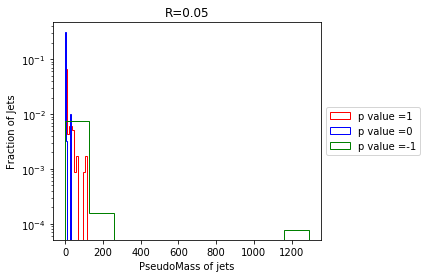

1
50
5084
92
92
1562
638
199


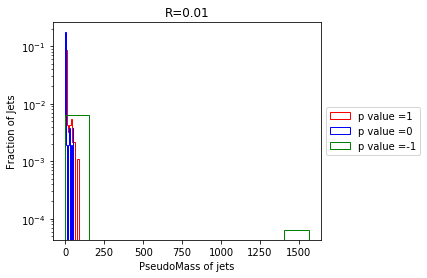

2
113
79861
146
146
174
1364
396


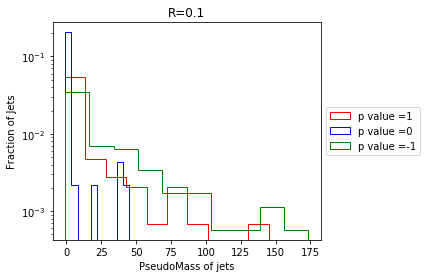

3
562
63342
940
940
1930
4477
1311


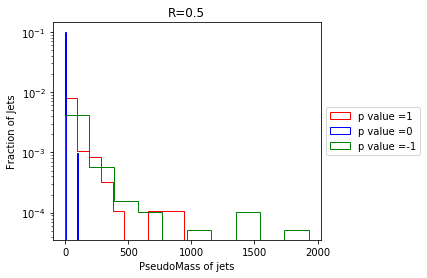

2
347
190945
87784
87784
35302
124967
190945


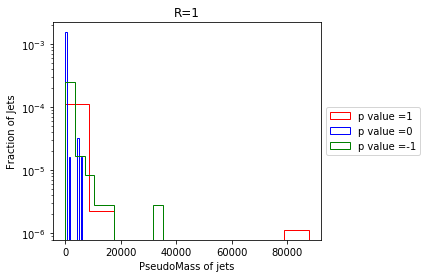

2
283
106395
14830
14830
19375
38490
106395


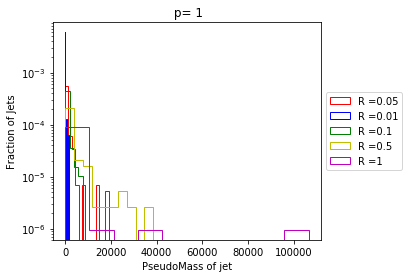

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


0
0
0
72
72
62
525
240


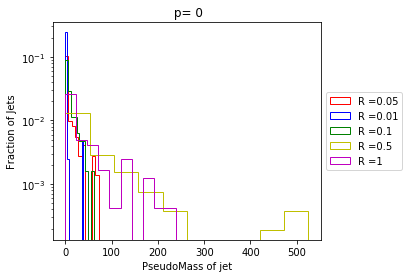

3
353
145384
1
1
7
4
3


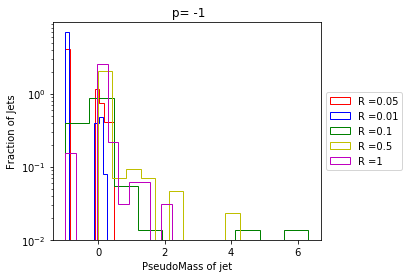

In [12]:
def plots(R,T,prameter):
    h11=[]
    h22=[]
    h33=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    for i in range(100): #calculate the the numbers of jet with p=1,R=0.05
        f=pesudo_jets()
        h11.append(PseudoMass(copy.copy(f),1,R) )
    #H1= filterNoneType(h1)
    
    
        h22.append(PseudoMass(copy.copy(f),0,R) )
    #H2= filterNoneType(h2)
        #H2 =[x for x in h2 if (x != 'NaN' and x!='None') ] 
     
   
        h33.append(PseudoMass(copy.copy(f),-1,R) )
    
    
        h1.insert(len(h1), PseudoMass(copy.copy(f),R,0.05))#R=p
        #h1.append(PseudoMass(p,0.05))
        #H1= filterNoneType(h1)
        
   

    
        
        h2.insert(len(h2), PseudoMass(copy.copy(f),R,0.01)) #R=p
       # h2.append(PseudoMass(p,0.01))
        #H2= filterNoneType(h2)
        
    

    
        h3.insert(len(h3), PseudoMass(copy.copy(f),R,0.1)) #R=p
        #h1.append(PseudoMass(p,0.1))
        #H3= filterNoneType(h1)
    
    


    
        h4.insert(len(h4), PseudoMass(copy.copy(f),R,0.5)) #R=p
        #h4.append(PseudoMass(p,0.5))
        #H4= filterNoneType(h4)
     
    


    
        h5.insert(len(h5), PseudoMass(copy.copy(f),R,1)) #R=p
        #h5.append(PseudoMass(p,1))
        #H5= filterNoneType(h5)
  

    b33=abs(int(max(h33)-min(h33))) #calculate numbers of bins
    #h3=np.nan_to_num(h3)
    print(b33)
     
        
    b22=abs(int(max(h22)-min(h22))) #calculate numbers of bins
    print(b22)
    #h2=np.nan_to_num(h2)    
        
        
        
    b11=abs(int(max(h11)-min(h11))) #calculate numbers of bins
    #h1=np.nan_to_num(h1)
    print(b11)

    b1=abs(int(max(h1)-min(h1)))#calculate numbers of bins
    print(b1)
    b2=abs(int(max(h1)-min(h2)))#calculate numbers of bins
    print(b2)
    b3=abs(int(max(h3)-min(h3)))#calculate numbers of bins
    print(b3)
    b4=abs(int(max(h4)-min(h4)))#calculate numbers of bins
    print(b4)
    b5=abs(int(max(h5)-min(h5))) #calculate numbers of bins
    print(b5)


    if R==1:
        b11=b22=b33=10
        
        
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.set_yscale("log")
    
    if(prameter=="R_prameter"):
        
    
        #draw the histogram from large and small R together to the differance 
        plt.hist(h1, bins=10, color='r',normed=True,histtype='step',label='p value =1') 
        plt.hist(h2, bins=10, color='b',normed=True,histtype='step' ,label='p value =0')
        plt.hist(h3, bins=10, color='g',normed=True,histtype='step' ,label='p value =-1')


        box = ax.get_position() #legend position
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]) #legend position

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        #plt.title("Jets")
        plt.xlabel("PseudoMass of jets")
        plt.ylabel("Fraction of Jets")
        plt.title(T)
        plt.show()    

    if (prameter=="p_prameter"):
        
        
        plt.hist(h1, bins=10, color='r',normed=True,histtype='step', label='R =0.05') 
        plt.hist(h2, bins=10, color='b',normed=True, histtype='step', label='R =0.01')
        plt.hist(h3, bins=10, color='g',normed=True,histtype='step', label='R =0.1')
        plt.hist(h4, bins=10, color='y',normed=True,histtype='step', label='R =0.5') 
        plt.hist(h5, bins=10, color='m',normed=True, histtype='step', label='R =1')

        box = ax.get_position() #legend position
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]) #legend position

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        #plt.title("Jets")
        plt.xlabel("PseudoMass of jet")
        plt.title(T)
        plt.ylabel("Fraction of Jets")
        plt.show()    
        
        
    
if __name__ == '__main__':
    
    plots(0.05,"R=0.05","R_prameter")
    plots(0.01,"R=0.01","R_prameter")
    plots(0.1,"R=0.1","R_prameter")
    plots(0.5,"R=0.5","R_prameter")
    plots(1,"R=1","R_prameter")
    plots(1," p= 1","p_prameter")
    plots(0," p= 0","p_prameter")
    plots(-1," p= -1","p_prameter")
 


## try

In [9]:
def plots(p,T):
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    
    for i in range(100): #calculate the the numbers of jet with p=1,R=0.05
        f=pesudo_jets()
        
        h1.insert(len(h1), PseudoMass(copy.copy(f),p,0.05))
        #h1.append(PseudoMass(p,0.05))
        #H1= filterNoneType(h1)
        
   

    
        
        h2.insert(len(h2), PseudoMass(copy.copy(f),p,0.01))
       # h2.append(PseudoMass(p,0.01))
        #H2= filterNoneType(h2)
        
    

    
        h3.insert(len(h3), PseudoMass(copy.copy(f),p,0.1))
        #h1.append(PseudoMass(p,0.1))
        #H3= filterNoneType(h1)
    
    


    
        h4.insert(len(h4), PseudoMass(copy.copy(f),p,0.5))
        #h4.append(PseudoMass(p,0.5))
        #H4= filterNoneType(h4)
     
    


    
        h5.insert(len(h5), PseudoMass(copy.copy(f),p,1))
        #h5.append(PseudoMass(p,1))
        #H5= filterNoneType(h5)
     
    b1=abs(int(max(h1)-min(h1)))#calculate numbers of bins
    b2=abs(int(max(h1)-min(h2)))#calculate numbers of bins
    b3=abs(int(max(h3)-min(h3)))#calculate numbers of bins
    b4=abs(int(max(h4)-min(h4)))#calculate numbers of bins
    b5=abs(int(max(h5)-min(h5))) #calculate numbers of bins

    fig = plt.figure()
    ax = plt.subplot(111)
    ax.set_yscale("log")

    plt.hist(h1, bins=b1, color='r',normed=True,histtype='step', label='R =0.05') 
    plt.hist(h2, bins=b2, color='b',normed=True, histtype='step', label='R =0.01')
    plt.hist(h3, bins=b3, color='g',normed=True,histtype='step', label='R =0.1')
    plt.hist(h4, bins=b4, color='y',normed=True,histtype='step', label='R =0.5') 
    plt.hist(h5, bins=b5, color='m',normed=True, histtype='step', label='R =1')

    box = ax.get_position() #legend position
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]) #legend position

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title("Jets")
    plt.xlabel("PseudoMass of jet")
    plt.title(T)
    plt.ylabel("Fraction of Jets")
    plt.show()    
plots(1," p= 1","p_prameter")
plots(0," p= 0","p_prameter")
plots(-1," p= -1","p_prameter")


TypeError: plots() takes 2 positional arguments but 3 were given